# 4: Virkninger uten markedspris og usikkerhet

SOK-2301 - Nytte-kostnadsanalyse i teori og praksis

Espen Sirnes  
2025-09-09

# Oversikt over ulike verdsettingsmetoder for prissetting:

|  | Tilnærming | Type verdi | Vanligste verdsettingsmetoder |
|------------------|------------------|------------------|--------------------|
| Faktisk marked | Markedsbasert | Bruksverdi | Markedspriser, kostnader ved avbøtende tiltak, kostnader ved å erstatte tapte miljøgoder |
| Parallelle markeder | Avslørte preferanser | Bruksverdi | Hedonisk prising (eiendomspriser, lønninger), reisekostnadsmetoden |
| Hypotetiske markeder | Uttrykte preferanser | Bruksverdi og ikke-bruksverdi | Betinget verdsetting, valgeksperimenter |

# Markedsbasert

-   Den foretrukkene metoden
-   Markedspriser er ofte ikke tilgjengelig

# Metoder basert på avslørte preferanser

-   Forholdsvis pålitelig
-   Begrenset bruksområde
-   Mest egnet til bruksverdi
-   Bør suppleres med uttryket preferanser

# Metode for uttrykte preferanser

-   Kan anvendes på alle typer goder
-   Folk vil ofte ikke oppgi korrekte svar på hypotetiske valg

# Bruk av fageksperter for å verdsette virkninger

-   Bedre til å vurdere sannsynligheter
-   Samme metoder for å avdekke preferanser kan brukes på eksperter
-   Ekspertvurdering vil ikke alltid samsvare med publikums egne
    preferanser
-   Brukes til å lage scenarioer for betinget verdsetting og
    valgeksperimenter

# Miljøvirkninger

<figure>
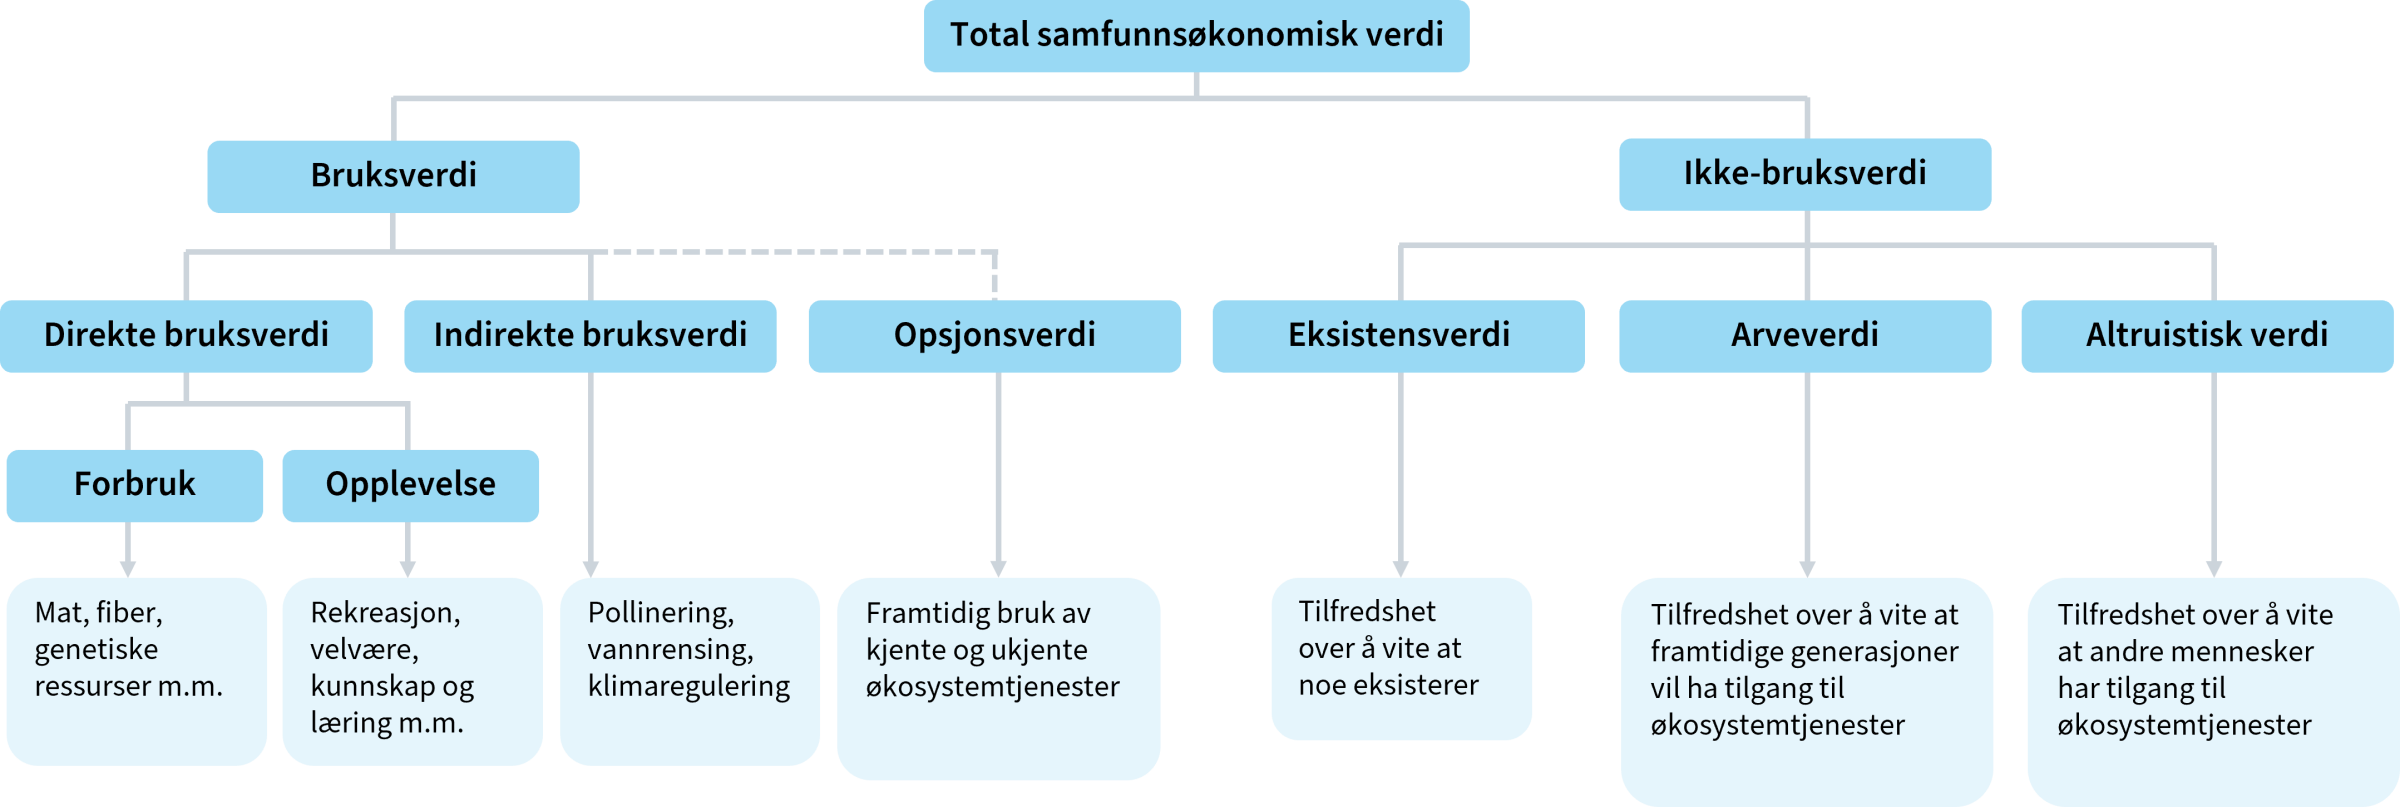
<figcaption aria-hidden="true">Miljøverdi</figcaption>
</figure>

-   Miljøverdi kan være vanskelig å verdsette, spesielt ikke-bruksverdi
-   Respondenter har ikke erfaring med å velge tilgangen eller kvalitet
-   Verdioverføringer fra tidligere gjennomførte studier
    -   forutsetter høy kvalitet på underliggende verdsettingsstudier

# Kostnadsbasert verdsettelse

-   Beregne hva det vil koste å unngå eller avbøte tapet av et miljøgode
-   F.eks. støyisolering

# Vurdering av usikkerhet kan grovt sett bestå av disse fire stegene:

-   kartlegg usikkerhetsfaktorene
-   klassifiser usikkerhetsfaktorene
-   gjennomfør usikkerhetsanalyse
-   vurder risikoreduserende tiltak

# Husk at usikkerhet allerede kan ha blitt tatt høyde for

-   Tiltak med høy risiko eller umoden teknologi kan ha blitt forkastet
    når relevante tiltak ble valg ut i arbeidsfase 2
-   Forventningsverdien tar hensyn til ulike sannsynligheter for ulike
    utfall
-   Kalkulasjonsrenten tar hensyn til risiko

## Ulike typer av usikkerhet

-   **Tiltaks- og prosjektinterne forhold**:
    -   Usikkerhet knyttet til gjennomføringen og prosjektering.
-   **Hendelsesusikkerhet**:
    -   Uforutsette hendelser for dette prosjektet (“usystematisk
        risiko”)
-   **Generell usikkerhet**:
    -   Generell risiko (“markedsrisiko”)

## Ulike typer usikkerhetsanalyse

-   Følsomhetsanalyser

|  | Pessimistisk verdi | Forventet verdi | Optimistisk verdi |
|-------------------|------------------|------------------|------------------|
| Forventet investeringskostnad (mill. kr) | 300 | 125 | 50 |
| Netto nåverdi (mill. kr) | -47 | 128 | 203 |

# Mer avanserte usikkerhetsanalyser

-   scenarioanalyser
    -   Utvidelse av følsomhetsanalyse
    -   Flere parameter endres samtidig
-   simuleringer
    -   Monte Carlo

# Monte Carlo

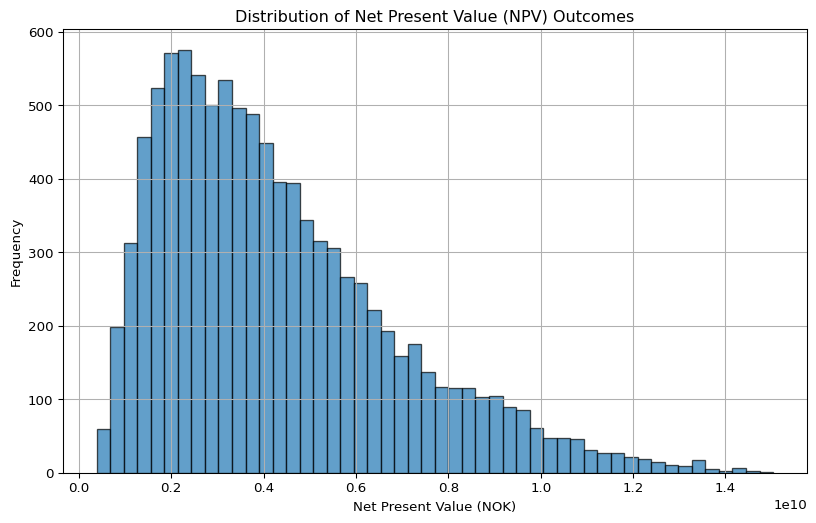

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate NPV
def net_present_value(inv, traveltime, persons, value_per_hour,
                      reduced_accident, maintenance, lifetime, discount_rate):
    
    # Calculate annual time savings benefit
    time_saving = traveltime * persons * 365 * value_per_hour
    
    # Total annual benefits
    annual_benefits = time_saving + reduced_accident 
    
    # Net benefits each year (benefits - maintenance costs)
    net_benefits_per_year = annual_benefits - maintenance
    
    # Calculate NPV of the benefits over the bridge's lifetime
    npv_benefits = sum(net_benefits_per_year / (1 + discount_rate) ** year for year in range(1, lifetime + 1))
    
    # Calculate total NPV (subtracting the initial investment)
    total_npv = npv_benefits - inv
    
    return total_npv

# Define the number of simulations
num_simulations = 10000

# Random value ranges for each parameter
inv_values = np.random.uniform(30e6, 70e6, num_simulations)  # Investment cost in NOK (30M to 70M)
traveltime_values = np.random.uniform(0.2, 1.0, num_simulations)  # Travel time saved per person (hours)
persons_values = np.random.uniform(5000, 15000, num_simulations)  # Number of people using the bridge daily
value_per_hour_values = np.random.uniform(50, 150, num_simulations)  # Value of time saved (NOK per hour)
reduced_accident_values = np.random.uniform(100000, 1000000, num_simulations)  # Accident reduction savings per year (NOK)
maintenance_values = np.random.uniform(200000, 500000, num_simulations)  # Maintenance cost per year (NOK)

# Fixed parameters
lifetime_years = 30  # Lifetime of the bridge in years
discount_rate = 0.03  # 3% discount rate

# Run simulations
npv_results = []
for i in range(num_simulations):
    npv = net_present_value(inv=inv_values[i], 
                            traveltime=traveltime_values[i], 
                            persons=persons_values[i], 
                            value_per_hour=value_per_hour_values[i], 
                            reduced_accident=reduced_accident_values[i], 
                            maintenance=maintenance_values[i], 
                            lifetime=lifetime_years, 
                            discount_rate=discount_rate)
    npv_results.append(npv)

# Plotting the distribution of NPV outcomes
plt.figure(figsize=(10,6))
plt.hist(npv_results, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Net Present Value (NPV) Outcomes')
plt.xlabel('Net Present Value (NOK)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Risikoreduserende tiltak

-   forebygge avvik fra forventningsverdien
-   planlegge for å begrense konsekvensene av avvik eller uheldige
    hendelser

# Realopsjoner

-   Det er betydelige (irreversible) kostnader forbundet med å komme
    tilbake til utgangspunktet
-   Det er sannsynlig at man senere får ny informasjon som gir god
    støtte i beslutningsprosessen.
-   Det er handlingsrom når man på et senere tidspunkt skal ta en ny
    beslutning om tiltak.

# Forskjellige typer realopsjoner

-   Utsatt beslutning
-   Trinnvis utbygging
-   Innbygd fleksibilitet
-   Avslutning av tiltak

# Fordelingsvirkninger

-   Skal ikke foretas fordelingsvekting i selve nåverdianalysen
    -   Tas med i tilleggsanalyse
-   Der det er relevant skal det gis tilleggsinformasjon om
    fordelingsvirkninger
-   Økt sysselsetting i én region på bekostning av færre sysselsatte i
    en annen, er en fordelingsvirkning - ikke en ringvirkning
-   Nyttig for beslutningstaker
-   Fordeling kan av og til være hovedformålet med tiltaket
    -   En kan da for eksempel sammenligne NV til ulike alternative
        måter å oppnå en bestemt fordeling
-   Vurder om det finnes kompenserende alternativer

# Hvilke fordelingsvirkninger er relevante?

-   geografiske regioner i Norge
-   offentlige virksomheter
-   privat næringsliv
-   privatpersoner
-   brukere og ikke-brukere av et offentlig tiltak

# Hvilke fordelingsvirkninger er relevante?

-   sosioøkonomiske grupper, inndelt etter for eksempel
    -   inntektsnivå
    -   sivil status
    -   alder
    -   barnefamilier
    -   funksjonsevne
    -   sykdomsgruppe
-   yrkesgrupper
-   forskjellige generasjoner
-   kjønn

# Eksempel på fordelingsanalyse:

-   Tiltak forventes å gi et samfunnsøkonomisk overskudd på 250 mill.
-   Deler inn i fem inntektsgrupper.

| Kvintil (inntekt)             | Beregnet overskudd ved tiltaket |
|-------------------------------|---------------------------------|
| 1\. kvintil (lavest)          | –45 000 000                     |
| 2\. kvintil                   | –60 000 000                     |
| 3\. kvintil                   | 20 000 000                      |
| 4\. kvintil                   | 150 000 000                     |
| 5\. kvintil (høyest)          | 185 000 000                     |
| **Summert over alle grupper** | **250 000 000**                 |

# Gegografisk fordeling

<figure>
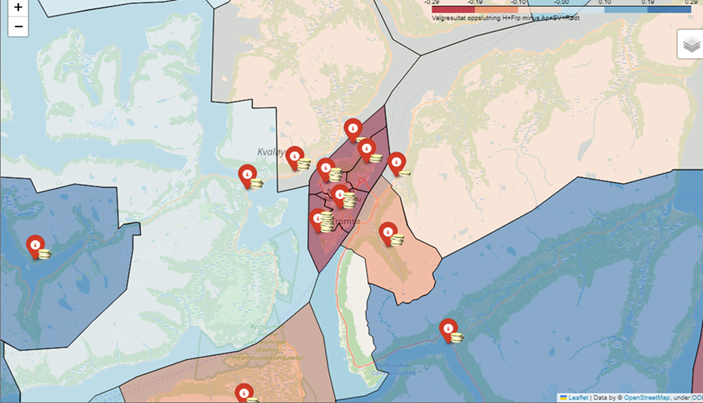
<figcaption aria-hidden="true">Kart</figcaption>
</figure>

[Lenke til
notebooks](https://espensirnes.github.io/notebooks/html/11%20-%20interaktive%20websider.html)

# Oppgave:

Se på rapporten du har

1.  Finn ett eksempel på verdivurderinger i rapporten der det ikke
    finnes noe faktisk marked
    -   Om du ikke finner noen, finnes det verdier rapporten ikke tar
        med, som den potensielt kunne anslått?
2.  Hvilken metode har forfatterne brukt på å finne verdien?
3.  Hvordan er usikkerhet tatt hensyn til?